In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [37]:
# Parameters
nx, ny = 41, 41        # Grid points
lx, ly = 2.0, 2.0      # Domain size
dx, dy = lx / (nx - 1), ly / (ny - 1)
nt = 500               # Number of time steps
dt = 0.001             # Time step size
rho = 1.0              # Density
nu = 0.1               # Kinematic viscosity

# Grid
x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)
X, Y = np.meshgrid(x, y)

# Initial conditions
u = np.random.rand(ny, nx)  # X-direction velocity
v = np.random.rand(ny, nx)  # Y-direction velocity
p = np.ones((ny, nx))  # Pressure


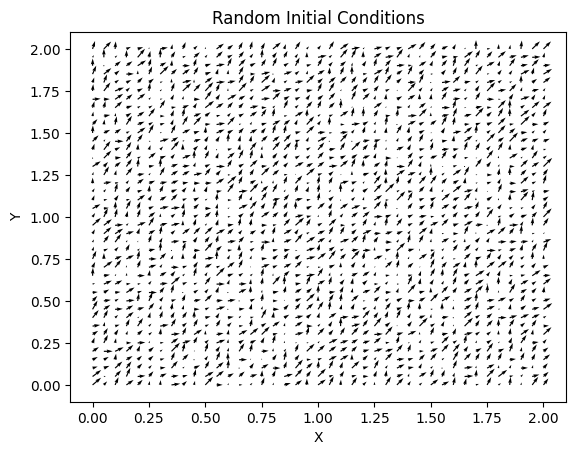

In [38]:
plt.quiver(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Initial Conditions')
plt.show()


In [39]:
# Function to calculate the Laplacian
def laplacian(f, dx, dy):
    return ((np.roll(f, 1, axis=0) + np.roll(f, -1, axis=0) - 2*f) / dx**2 +
            (np.roll(f, 1, axis=1) + np.roll(f, -1, axis=1) - 2*f) / dy**2)

In [40]:
# Time-stepping loop
for n in range(nt):
    un = u.copy()  # Store previous time step u
    vn = v.copy()  # Store previous time step v
    
    # Update velocities using explicit finite difference scheme
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, :-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[:-2, 1:-1]) +
                     nu * dt * laplacian(un, dx, dy)[1:-1, 1:-1])
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, :-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[:-2, 1:-1]) +
                     nu * dt * laplacian(vn, dx, dy)[1:-1, 1:-1])
    
    # Boundary conditions (e.g., no-slip)
    u[0, :], u[-1, :], u[:, 0], u[:, -1] = 0, 0, 0, 0
    v[0, :], v[-1, :], v[:, 0], v[:, -1] = 0, 0, 0, 0



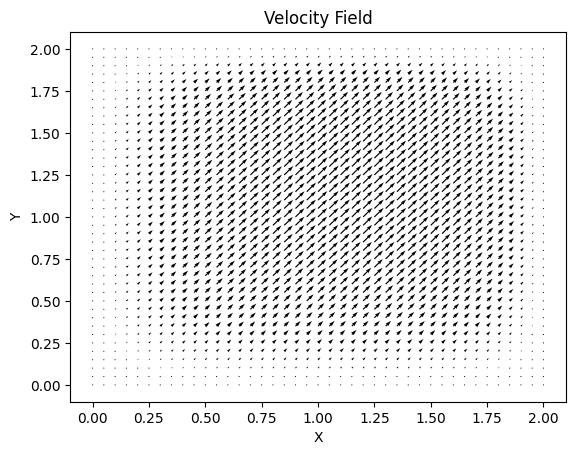

In [41]:
# Plot results
plt.quiver(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Velocity Field')
plt.show()


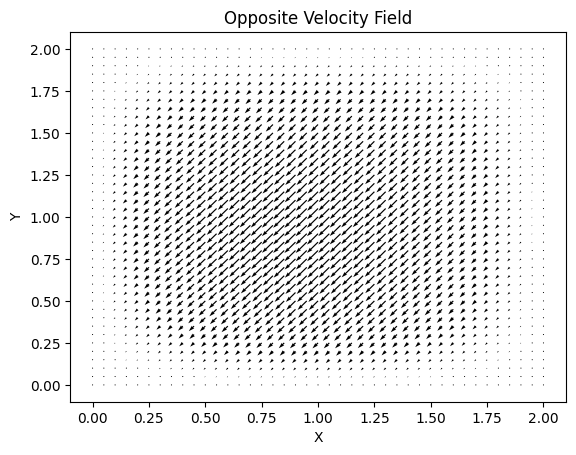

In [42]:
# Sanity check
u = -u
v = -v
p = -p
for n in range(nt):
    un = u.copy()  # Store previous time step u
    vn = v.copy()  # Store previous time step v
    
    # Update velocities using explicit finite difference scheme
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, :-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[:-2, 1:-1]) +
                     nu * dt * laplacian(un, dx, dy)[1:-1, 1:-1])
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, :-2]) -
                     vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[:-2, 1:-1]) +
                     nu * dt * laplacian(vn, dx, dy)[1:-1, 1:-1])
    
    # Boundary conditions (e.g., no-slip)
    u[0, :], u[-1, :], u[:, 0], u[:, -1] = 0, 0, 0, 0
    v[0, :], v[-1, :], v[:, 0], v[:, -1] = 0, 0, 0, 0



plt.quiver(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Opposite Velocity Field')
plt.show()
